# Logistic Regression (Classification) 

---

## sklearn.linear_model.LogisticRegression

### LogisticRegression(C=1.0, solver='lbfgs’, max_iter=100, multi_class='auto')<br>
#### - C : 정규화강도의 역수(값이 작을수록 강한 정규화)
#### - solver : 최적화 문제해결 알고리즘 {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}
#### - max_iter : 최대 반복수
#### - multi_class : 옵션 {‘auto’, ‘ovr’, ‘multinomial’}
##### → OvR(One-versus-the-Rest) : 어떤 하나의 클래스에 속한 것과 다른 모든 것을 분류하는 분류기를 만들고, 각 분류기의 점수 중에서 가장 높은 것을 선택하는 전략. OvA(One-versus-One)라고도 함
##### → OvO : 어떤 하나의 클래스와 다른 하나의 클래스에 속한 것을 분류하는 각각의 분류기를 만들고, 각 분류기의 점수들을 사용하는 전략

---

### 데이터 준비 

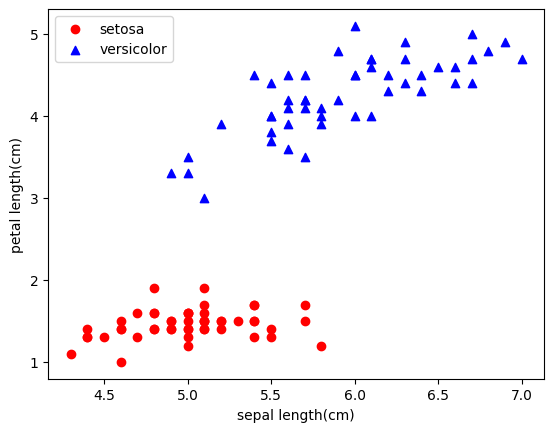

In [2]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np

iris = load_iris()
X = iris["data"][0:100, (0,2)] # 처음 100개의 데이터 중에서 꽃받침 길이, 꽃잎 길이
y = iris["target"][0:100] # 처음 50개는 Iris-setosa, 다음 50개는 Iris-versicolor
y = np.where(y==0, -1, 1) # 만일 Iris-setosa이면 -1, 아니면 1로 변경

plt.scatter(X[0:50, 0], X[0:50, 1], color="r", marker="o", label="setosa")
plt.scatter(X[50:100, 0], X[50:100, 1], color="b", marker="^", label="versicolor")
plt.xlabel('sepal length(cm)')
plt.ylabel('petal length(cm)')
plt.legend()
plt.show()

### Binary Logistic Regression(Classification)

accuracy: 1.0


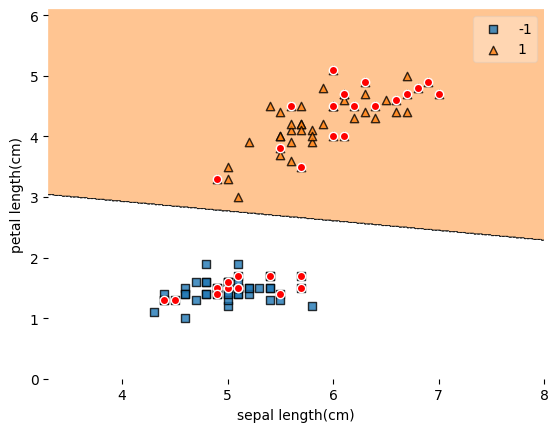

In [4]:
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions       # mlxtend 설치 : pip install mlxtend 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"accuracy: {accuracy_score(y_test, y_pred)}")

plot_decision_regions(X, y, clf=model)
plt.scatter(X_test[:,0], X_test[:,1], marker="o", color="r", edgecolor="w")
plt.xlabel('sepal length(cm)')
plt.ylabel('petal length(cm)')
plt.show()